<h2>Kaggle Titanic survivor ML competition</h2>

<h2>Import Libraries </h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

<h2>Import Data </h2>

<b>Use Pandas to import data and create data frame</b>

In [3]:
# Read in training csv file
df_train = pd.read_csv("titanic_train.csv")


# Read in test file
df_test = pd.read_csv("titanic_test.csv")

# Read in gender file
titanic_gender = pd.read_csv("titanic_gender_submission.csv")


# *OPTIONAL* Combine the 2 files into df_test
# 
# titanic_test = pd.read_csv("titanic_test.csv")
#
# df_test = pd.merge(titanic_test, titanic_gender, on = "PassengerId")
#
## The 2 files are merged into the test set to allow us to know which passengers survived when testing the models.

In [4]:
# dftest

<h2>Data variable/feature definitions </h2>

<ul>
    <li><u>PassengerId:</u>  Unique ID for each passenger </li>
<li><u>Pclass</u>     :  Passenger class. First, Second or Third Class </li>
<li><u>Name</u>       :  Passenger's name </li>
<li><u>Sex</u>        :  Sex of passenger, Male or Female </li>
<li><u>Age </u>       :  Passenger's age </li>
<li><u>SibSp </u>     :  Number of siblings and/or spouses travelling with the passenger </li>
<li><u>Parch </u>     :  Number of parents and/or children travelling with the passenger </li>
<li><u>Ticket</u>     :  Passenger's ticket number </li>
<li><u>Fare</u>       :  Ticket cost </li>
<li><u>Cabin</u>      :  Cabin or room number </li> 
<li><u>Embarked</u>   :  Where did passenger leave from </li>

<li><u>Survived</u>   :  Dependent variable (y-variable) </li>
</ul>

<h1>Data Analysis</h1>

In [5]:
# Check the shape of the data (rows x columns)

df_train.shape, df_test.shape

((891, 12), (418, 11))

In [6]:
# View the (head) top few rows of training data

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# View the (head) top few rows of test data

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Descriptive statistics of the training set

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Descriptive statistics of the test set

df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Which columns contain missing values in training set

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Alternative method to view the number of missing values in the training set
# df_train.isnull()

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Alternative method to view the number of missing values in the test set
# df_train.isnull()

df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h2>Data Visualizations </h2>

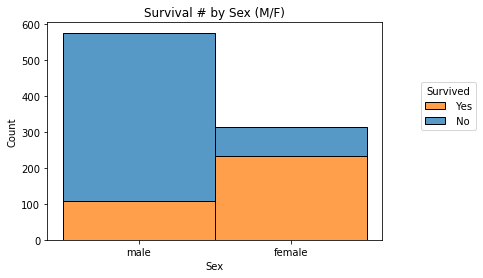

In [13]:
# Histogram to display survival by sex, M or F

sns.histplot(data=df_train, x='Sex', hue='Survived', multiple='stack').set(title="Survival # by Sex (M/F)")

plt.legend(labels=[" Yes"," No " ], title="Survived", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()

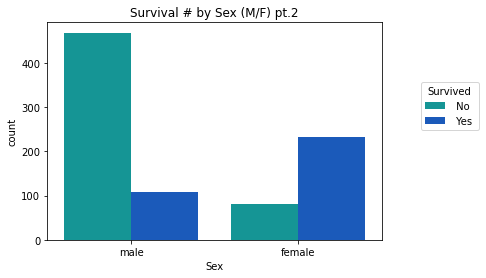

In [14]:
sns.countplot(data=df_train, x="Sex", hue='Survived', palette='winter_r').set(title="Survival # by Sex (M/F) pt.2")

plt.legend(labels=[" No"," Yes " ], title="Survived", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()

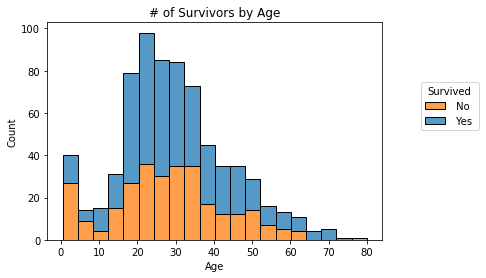

In [15]:
# Histogram to display number of passengers that survived vs. did not survive

sns.histplot(data=df_train, x="Age", color='red', hue='Survived', multiple="stack").set(title="# of Survivors by Age")

plt.legend(labels=[" No"," Yes " ], title="Survived", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()

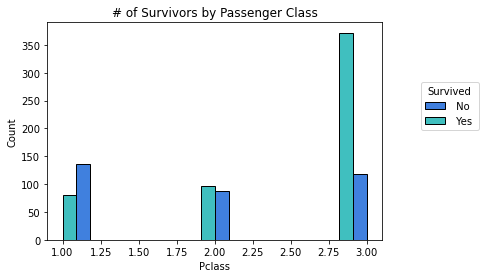

In [16]:
# Histogram to display survival numbers by passenger class

sns.histplot(data=df_train, x='Pclass', hue='Survived', multiple='dodge', palette='winter_r').set(title="# of Survivors by Passenger Class")

plt.legend(labels=[" No"," Yes " ], title="Survived", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()

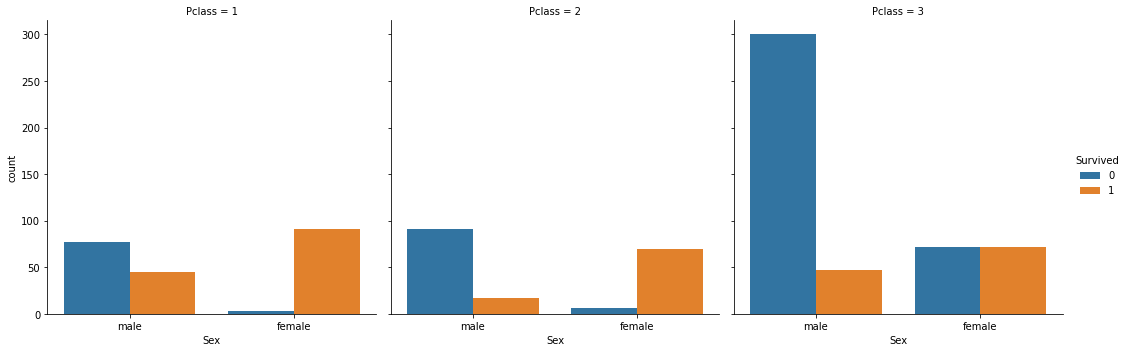

In [17]:
# Categorical Plot to display survival numbers by passenger class and sex

sns.catplot(data=df_train, x='Sex', col='Pclass', hue='Survived', kind='count', ci=0) #.set(title = "# of Survivors for Passenger Class and Sex (M/F)")

#plt.legend(labels=[" No"," Yes " ], title="Survive", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()

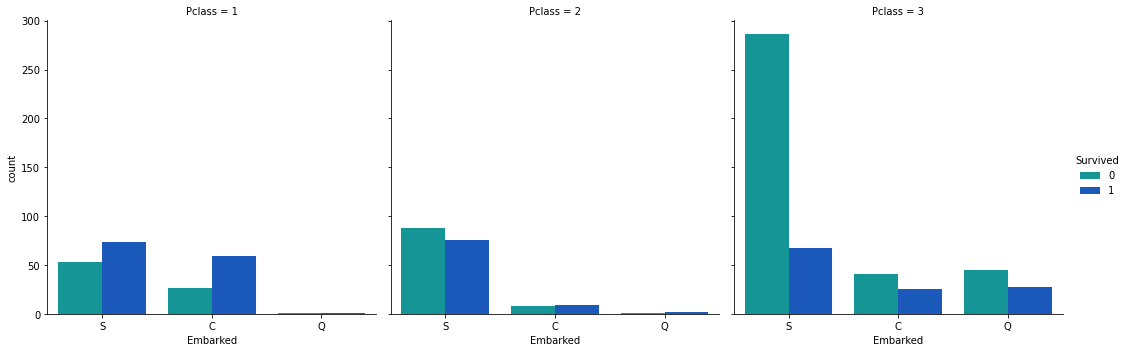

In [18]:
# Categorical Plot to display number of survivors based on their class and embark location

sns.catplot(data=df_train, x='Embarked', col='Pclass', hue='Survived', kind='count', ci=0, palette='winter_r') #

#plt.legend(labels=[" No"," Yes " ], title="Survive", loc="upper left", bbox_to_anchor=(1.0, 0.75) )

plt.show()

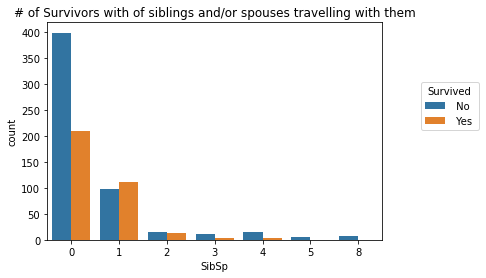

In [19]:
sns.countplot(data=df_train, x="SibSp", hue='Survived').set(title="# of Survivors with of siblings and/or spouses travelling with them")

plt.legend(labels=[" No"," Yes " ], title="Survived", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()

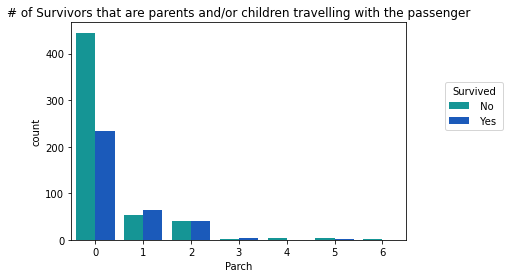

In [20]:
sns.countplot(data=df_train, x="Parch", hue='Survived', palette='winter_r').set(title="# of Survivors that are parents and/or children travelling with the passenger")

plt.legend(labels=[" No"," Yes " ], title="Survived", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()

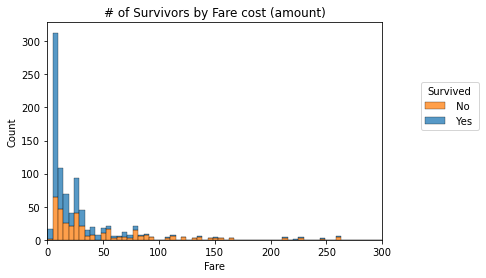

In [21]:
# Fare survival

sns.histplot(data=df_train, x='Fare', hue='Survived', multiple='stack').set(title="# of Survivors by Fare cost (amount)") #

plt.xlim(0,300)

plt.legend(labels=[" No"," Yes " ], title="Survived", loc="upper left", bbox_to_anchor=(1.1, 0.75) )

plt.show()


<h1>Prepare Training Dataset</h1>

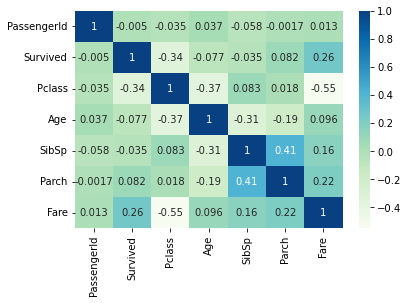

In [22]:
sns.heatmap(df_train.corr(),annot=True, cmap="GnBu");

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


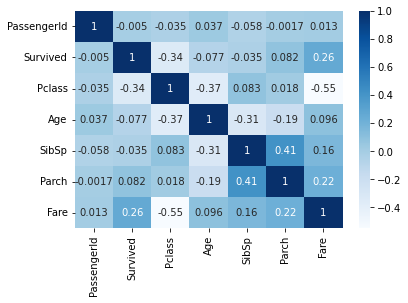

In [23]:
#Correlation map

correlation = df_train.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="Blues")
    
correlation

In [24]:
# View passenger ages

df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<b>Get age based on Prefix (Mr, Mrs, etc.)</b>

In [25]:
df_train['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [26]:
# Create "Prefix" column, then use lambda function to strip the prefix of each passenger and 
# populate the new "Prefix" column with that value

df_train['Prefix'] = df_train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip() )

In [27]:
# Number of each prefix

df_train['Prefix'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Prefix, dtype: int64

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
# Create group of prefixes by M/F sex.

grouped = df_train.groupby(['Sex','Prefix'])

In [30]:
# Identify the median age of each prefix in m/f groups

grouped['Age'].median()

Sex     Prefix      
female  Dr              49.0
        Lady            48.0
        Miss            21.0
        Mlle            24.0
        Mme             24.0
        Mrs             35.0
        Ms              28.0
        the Countess    33.0
male    Capt            70.0
        Col             58.0
        Don             40.0
        Dr              44.0
        Jonkheer        38.0
        Major           48.5
        Master           3.5
        Mr              30.0
        Rev             46.5
        Sir             49.0
Name: Age, dtype: float64

In [31]:
# Populate any "Nan" values in the Age column with the median value for that respective
# age's m/f group

df_train['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.median()))

In [32]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [33]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Prefix           0
dtype: int64

In [34]:
# Populate NAN Embark values with the value of the most frequent location.

df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [35]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
df_train['Embarked'] = df_train['Embarked'].fillna(value='S')

In [38]:
# View unique values for Cabin

df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
# If ticket number begins with Alpha or Numeric character

df_train['Ticket_1'] = df_train['Ticket'].apply(lambda x: 1 if x[:1].isalpha() else 0 )

In [40]:
#df_train['Ticket_1']

In [41]:
# Convert Sibling-Spouse and Parent-Child values to 0 or 1.  
# Either the passenger travelled with a Sibling, Spouse, Parent OR Child

df_train['SibSp_2'] = df_train['SibSp'].apply(lambda x: 1 if x >= 1 else 0)

df_train['Parch_2'] = df_train['Parch'].apply(lambda x: 1 if x >= 1 else 0)

# New variable to indicate if either SibSp or Parch contains a value greater than 1.
SSPC =  ( df_train['SibSp'] >=1) | (df_train['Parch'] >=1) 

df_train['SibSpParch'] = SSPC.astype(int)



In [42]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_1,SibSp_2,Parch_2,SibSpParch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.387396,0.523008,0.381594,32.204208,0.258137,0.317621,0.239057,0.397306
std,257.353842,0.486592,0.836071,13.261963,1.102743,0.806057,49.693429,0.437855,0.465813,0.426747,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


<b>One-Hot Encoding (Dummy variables)</b>

In [43]:
# dummy_Embark = pd.get_dummies(df_train, columns=['Embarked'])

# dummy_Embark

In [44]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'], prefix='Embarked')], axis=1)

df_train = pd.concat([df_train, pd.get_dummies(df_train['Sex'], prefix='Sex')], axis=1)

df_train = pd.concat([df_train, pd.get_dummies(df_train['Prefix'], prefix='Prefix')], axis=1)

<b>Add prefix column to training data to keep training and test datasets consistent...</b>

In [45]:
# Added this "Prefix Column" to remain consistent with prefixes in the test data..

df_train['Prefix_Dona']         = 0

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Cabin                204 non-null    object 
 11  Embarked             891 non-null    object 
 12  Prefix               891 non-null    object 
 13  Ticket_1             891 non-null    int64  
 14  SibSp_2              891 non-null    int64  
 15  Parch_2              891 non-null    int

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<b>Drop unneeded training columns</b>

In [48]:
# Drop columns that are not needed...

y_train = df_train['Survived'] 

x_train = df_train.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Prefix'], axis=1)

<h1>Prepare Test Dataset </h1>

In [49]:
# Fill "Nan" values in Age column with median value of m/f grouped age

df_test['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.median()))


# Get "Prefixes" from test data set - ensure that they are the same as
# those in the training data set.

df_test['Prefix'] = df_test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip() )

In [50]:
# Display the values of "Embarked" column... This gives an idea of how many 
# additional columns will be created with dummy variables...

df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [51]:
# If ticket number begins with Alpha or Numeric character

df_test['Ticket_1'] = df_test['Ticket'].apply(lambda x: 1 if x[:1].isalpha() else 0 )

<b>One-hot encoding - dummy variables for test dataset </b>

In [52]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'], prefix='Embarked')], axis=1)

df_test = pd.concat([df_test, pd.get_dummies(df_test['Sex'], prefix='Sex')], axis=1)

df_test = pd.concat([df_test, pd.get_dummies(df_test['Prefix'], prefix='Prefix')], axis=1)


<b> Add column names to match the PREFIX columns in training dataset... </b>

In [53]:
df_test['Prefix_Capt']         = 0
df_test['Prefix_Don']          = 0
df_test['Prefix_Jonkheer']     = 0
df_test['Prefix_Lady']         = 0
df_test['Prefix_Major']        = 0 
df_test['Prefix_Mlle']         = 0
df_test['Prefix_Mme']          = 0
df_test['Prefix_Sir']          = 0
df_test['Prefix_the Countess'] = 0


In [54]:
# df_test.isnull().sum()

In [55]:
# Description of Test data

df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Ticket_1,Embarked_C,Embarked_Q,Embarked_S,...,Prefix_Rev,Prefix_Capt,Prefix_Don,Prefix_Jonkheer,Prefix_Lady,Prefix_Major,Prefix_Mlle,Prefix_Mme,Prefix_Sir,Prefix_the Countess
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0
mean,1100.500000,2.265550,28.409689,0.447368,0.392344,35.627188,0.291866,0.244019,0.110048,0.645933,...,0.004785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,120.810458,0.841838,13.008771,0.896760,0.981429,55.907576,0.455166,0.430019,0.313324,0.478803,...,0.069088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,892.000000,1.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1100.500000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1204.750000,3.000000,35.000000,1.000000,0.000000,31.500000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1309.000000,3.000000,71.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Substitute "Nan" values in "Fare" column with the median value of that column.

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median() )

In [57]:
# Convert Sibling-Spouse and Parent-Child values to 0 or 1.  
# Either the passenger travelled with a Sibling, Spouse, Parent OR Child

df_test['SibSp_2'] = df_test['SibSp'].apply(lambda x: 1 if x >= 1 else 0)

df_test['Parch_2'] = df_test['Parch'].apply(lambda x: 1 if x >= 1 else 0)


SSPC =  ( df_test['SibSp'] >=1) | (df_test['Parch'] >=1) 

df_test['SibSpParch'] = SSPC.astype(int)

<b>Drop unneeded columns in test dataset </b>

In [58]:
# Drop unneeded test columns

#y_test = df_test['Survived']
#x_test = df_test.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Prefix'], axis=1)
x_test = df_test.drop(['Name', 'Sex', 'Ticket',  'Cabin', 'Embarked', 'Prefix'], axis=1)

In [59]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Age                  418 non-null    float64
 3   SibSp                418 non-null    int64  
 4   Parch                418 non-null    int64  
 5   Fare                 418 non-null    float64
 6   Ticket_1             418 non-null    int64  
 7   Embarked_C           418 non-null    uint8  
 8   Embarked_Q           418 non-null    uint8  
 9   Embarked_S           418 non-null    uint8  
 10  Sex_female           418 non-null    uint8  
 11  Sex_male             418 non-null    uint8  
 12  Prefix_Col           418 non-null    uint8  
 13  Prefix_Dona          418 non-null    uint8  
 14  Prefix_Dr            418 non-null    uint8  
 15  Prefix_Master        418 non-null    uin

In [60]:
# x_train

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Age                  891 non-null    float64
 3   SibSp                891 non-null    int64  
 4   Parch                891 non-null    int64  
 5   Fare                 891 non-null    float64
 6   Ticket_1             891 non-null    int64  
 7   SibSp_2              891 non-null    int64  
 8   Parch_2              891 non-null    int64  
 9   SibSpParch           891 non-null    int32  
 10  Embarked_C           891 non-null    uint8  
 11  Embarked_Q           891 non-null    uint8  
 12  Embarked_S           891 non-null    uint8  
 13  Sex_female           891 non-null    uint8  
 14  Sex_male             891 non-null    uint8  
 15  Prefix_Capt          891 non-null    uin

<h2>Create Logistic Model </h2>

In [61]:

model = LogisticRegression()

model.fit(x_train, y_train)


LogisticRegression()

In [62]:
# Accuracy cross validation scores for training data

scores = cross_val_score(model, x_train, y_train, cv=10)
                         
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.75555556 0.83146067 0.7752809  0.85393258 0.84269663 0.79775281
 0.82022472 0.80898876 0.85393258 0.83146067]


In [63]:
# Accuracy score for training data

print(model.score(x_train, y_train))

0.8271604938271605


In [64]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7555555555555555, 0.8171285892634208, 0.8539325842696629)

<h2>Create Support Vector Machine (SVM) Model</h2>

In [65]:
svm_model = svm.SVC(kernel = 'linear')

svm_model = svm_model.fit(x_train, y_train)

svm_model

SVC(kernel='linear')

In [66]:
svm_scores = cross_val_score(svm_model, x_train, y_train, cv=10)

print (svm_scores)

[0.83333333 0.84269663 0.7752809  0.87640449 0.83146067 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]


In [67]:
print ( svm_model.score(x_train, y_train) )

0.8316498316498316


<h2>Create Predictions</h2>

In [68]:
# Create prediction set for logistic model

y_pred = model.predict(x_test)

In [69]:
y_pred.shape

(418,)

In [70]:
# Print predictions

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1
 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 0 0 1 0 0 1 0 0 0]


<b>Create .csv file for submission </b>